In [26]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pathlib

# Define the path to your dataset
data_dir = "E:/Photos/Fotos/"

validation_split = 0.2
test_split = 0.1

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,)
  
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123)
  

Found 41 files belonging to 2 classes.
Using 33 files for training.
Found 41 files belonging to 2 classes.
Using 8 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)

['RT', 'casas']


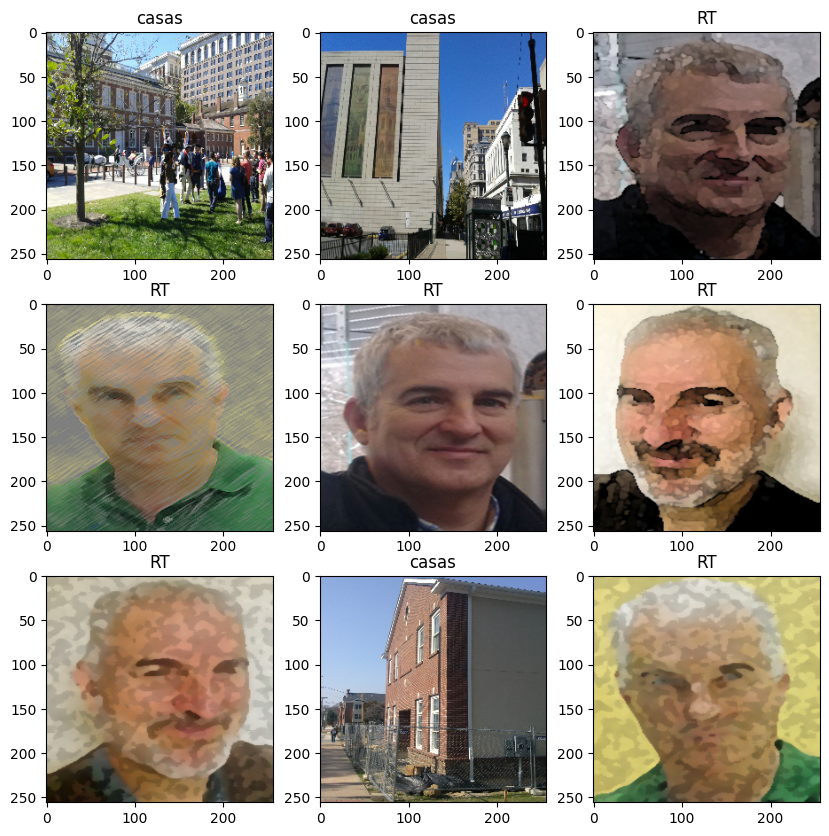

In [28]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [29]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.023146447 1.0


<Figure size 1000x1000 with 0 Axes>

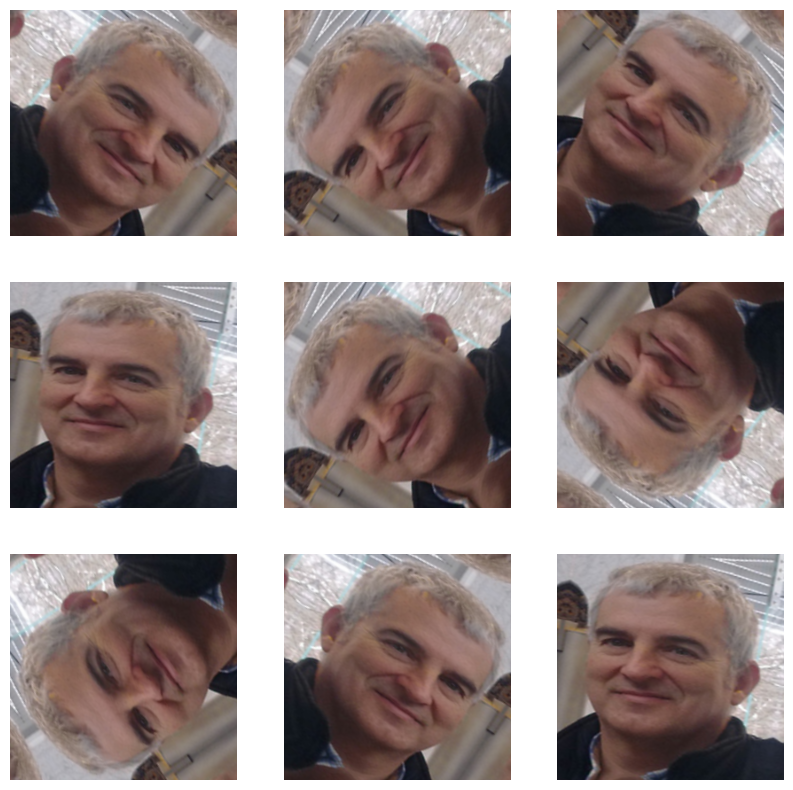

In [30]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
# Add the image to a batch.
plt.figure(figsize=(10, 10))

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image_batch)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

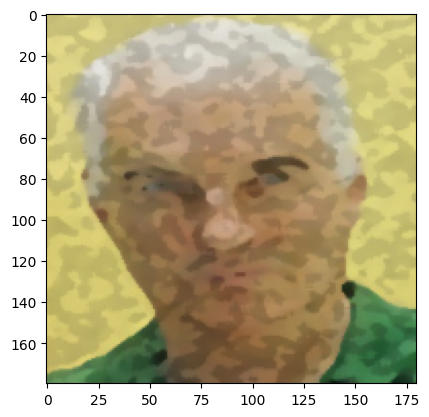

In [31]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
result = resize_and_rescale(images[i].numpy().astype("uint8"))
_ = plt.imshow(result)

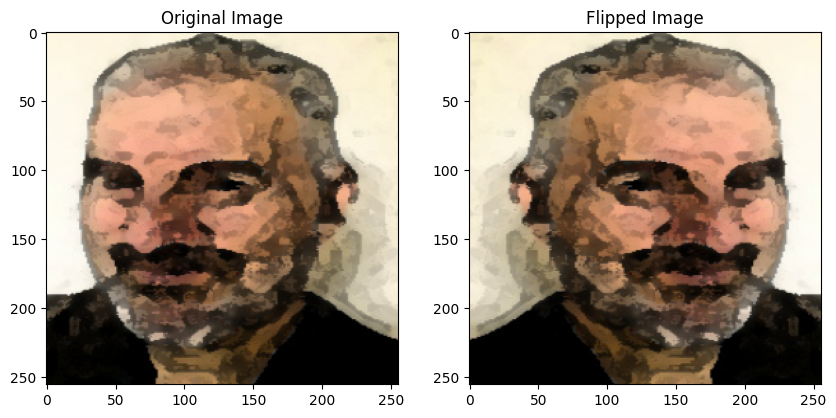

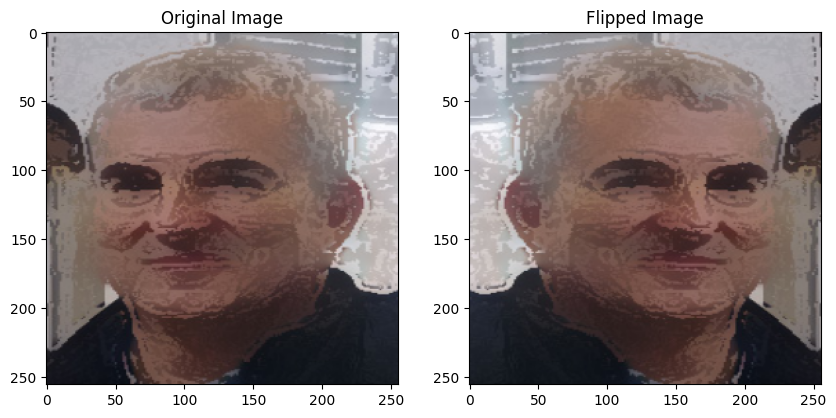

In [34]:
# Define a function to visualize images and their flipped counterparts
def visualize_flipped_image(image):
    # Flip the image left-right
    flipped = tf.image.flip_left_right(image)
    
    # Convert to numpy arrays for visualization
    original_image = np.array(image[0])
    flipped_image = np.array(flipped[0])
    
    # Clip the pixel values to the range [0, 255] for proper visualization
    original_image = np.clip(original_image, 0, 255)
    flipped_image = np.clip(flipped_image, 0, 255)
    
    # Visualize the original and flipped images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image.astype(np.uint8))
    axes[0].set_title('Original Image')
    axes[0].axis('on')
    axes[1].imshow(flipped_image.astype(np.uint8))
    axes[1].set_title('Flipped Image')
    axes[1].axis('on')
    plt.show()

# Visualize images and their flipped counterparts from the dataset
for images, _ in train_ds.take(5):  # Visualize the first 5 images
    visualize_flipped_image(images)


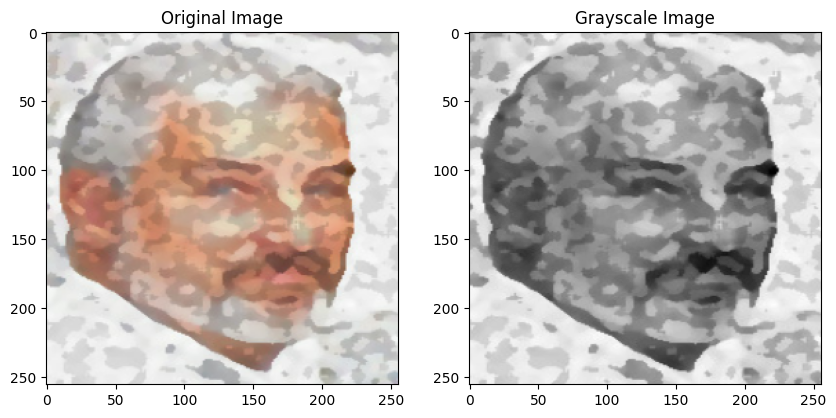

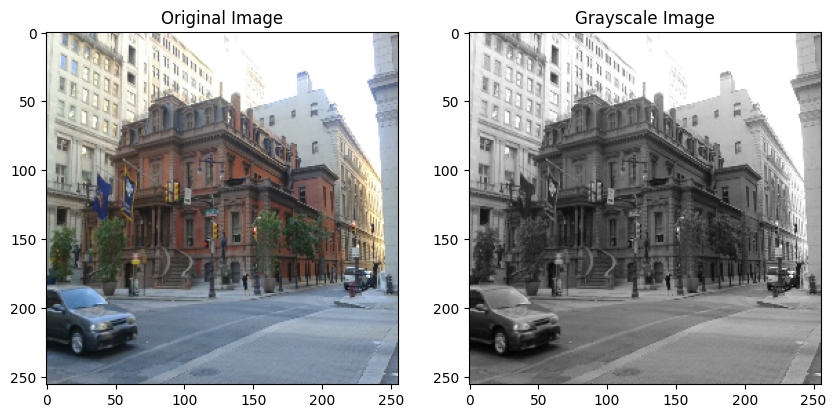

In [23]:
# Define a function to visualize images and their grayscale counterparts
def visualize_grayscale_image(image):
    # Convert the image to grayscale
    grayscale_image = tf.image.rgb_to_grayscale(image)
    
    # Convert to numpy arrays for visualization
    original_image = np.array(image[0])
    grayscale_image = np.array(grayscale_image[0])
    
    # Clip the pixel values to the range [0, 255] for proper visualization
    original_image = np.clip(original_image, 0, 255)
    grayscale_image = np.clip(grayscale_image, 0, 255)
    
    # Visualize the original and grayscale images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image.astype(np.uint8))
    axes[0].set_title('Original Image')
    axes[0].axis('on')
    axes[1].imshow(grayscale_image.astype(np.uint8), cmap='gray')
    axes[1].set_title('Grayscale Image')
    axes[1].axis('on')
    plt.show()

# Visualize images and their grayscale counterparts from the dataset
for images, _ in train_ds.take(5):  # Visualize the first 5 images
    visualize_grayscale_image(images)

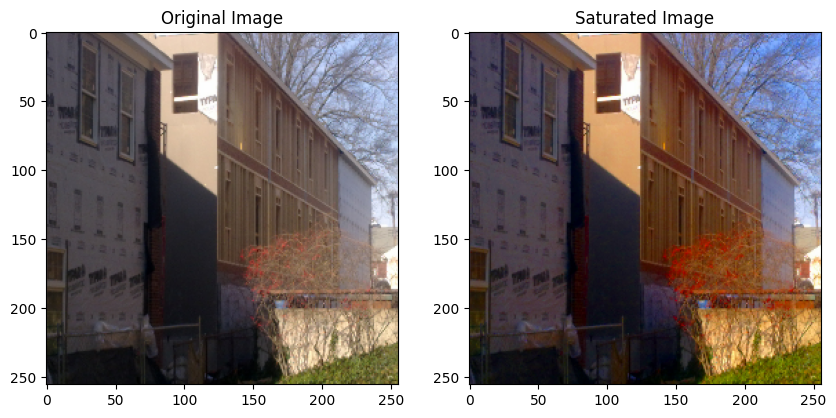

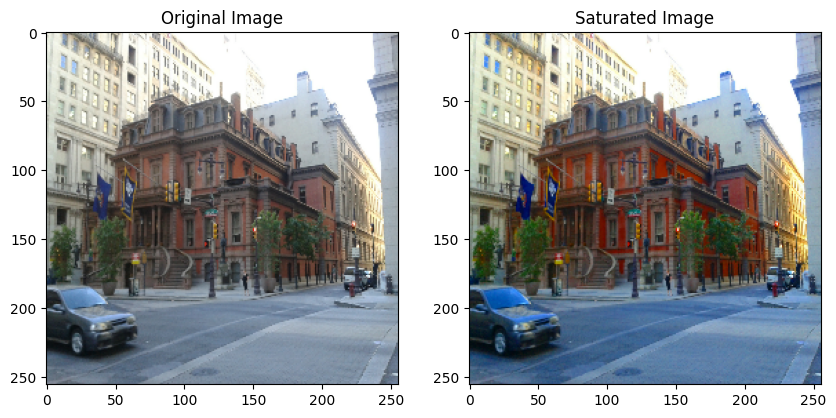

In [74]:
# Define a function to visualize images and their saturated counterparts
def visualize_saturated_image(image):
    # Saturate the image
    saturated_image = tf.image.adjust_saturation(image, saturation_factor=2.0)  # Adjust saturation factor as needed
    
    # Convert to numpy arrays for visualization
    original_image = np.array(image[0])
    saturated_image = np.array(saturated_image[0])
    
    # Clip the pixel values to the range [0, 255] for proper visualization
    original_image = np.clip(original_image, 0, 255)
    saturated_image = np.clip(saturated_image, 0, 255)
    
    # Visualize the original and saturated images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image.astype(np.uint8))
    axes[0].set_title('Original Image')
    axes[0].axis('on')
    axes[1].imshow(saturated_image.astype(np.uint8))
    axes[1].set_title('Saturated Image')
    axes[1].axis('on')
    plt.show()

# Visualize images and their saturated counterparts from the dataset
for images, _ in train_ds.take(5):  # Visualize the first 5 images
    visualize_saturated_image(images)

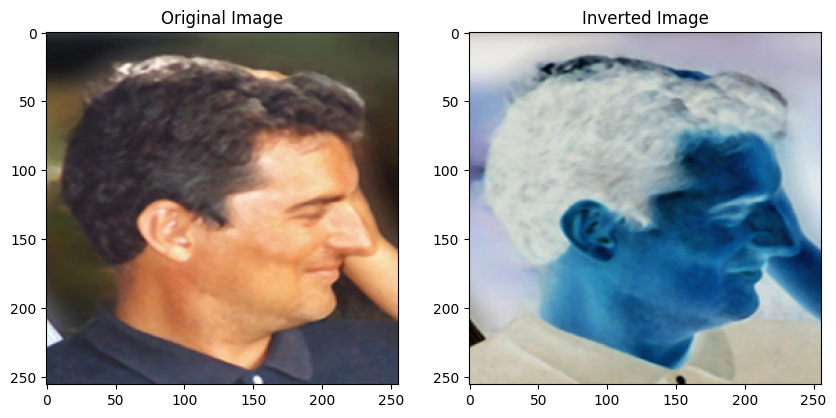

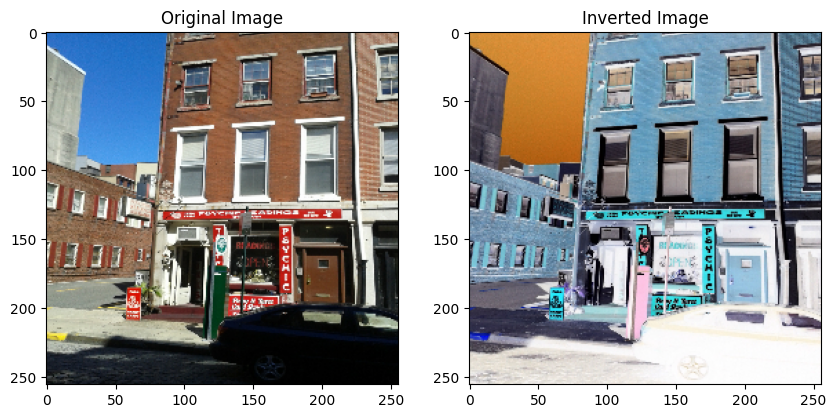

In [82]:
# Define a function to visualize images and their inverted counterparts
def visualize_inverted_image(image):
    # Invert the colors of the image
    inverted_image = 255 - image
    
    # Convert to numpy arrays for visualization
    original_image = np.array(image[0])
    inverted_image = np.array(inverted_image[0])
    
    # Clip the pixel values to the range [0, 255] for proper visualization
    original_image = np.clip(original_image, 0, 255)
    inverted_image = np.clip(inverted_image, 0, 255)
    
    # Visualize the original and inverted images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image.astype(np.uint8))
    axes[0].set_title('Original Image')
    axes[0].axis('on')
    axes[1].imshow(inverted_image.astype(np.uint8))
    axes[1].set_title('Inverted Image')
    axes[1].axis('on')
    plt.show()

# Visualize images and their inverted counterparts from the dataset
for images, _ in train_ds.take(5):  # Visualize the first 5 images
    visualize_inverted_image(images)